import all dependencies

In [31]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd


In [32]:
from models_predictions import get_modelpredictions, predictivity, get_model_neural_splithalfcorr

In [33]:
import h5py


file_path = '/Users/ramahuja/Library/CloudStorage/Dropbox-KoLab/ViTA Lab Datastore/users/ram/thesis/data/neural/coco_neural.h5'

try:
    with h5py.File(file_path, 'r') as file:
        # List all groups
        print("Keys: %s" % file.keys())
        for key in file.keys():
            print("\nGroup: ", key)
            # Get the object by key
            data = file[key]
            # Check if the object is a group (folder) or a dataset (file)
            if isinstance(data, h5py.Group):
                # It's a group, list all datasets in this group
                print("Datasets: ", list(data.keys()))
            elif isinstance(data, h5py.Dataset):
                # It's a dataset, display its shape
                print("Shape: ", data.shape)
except Exception as e:
    print("Error: ", str(e))

Keys: <KeysViewHDF5 ['monkey1']>

Group:  monkey1
Datasets:  ['rates']


In [30]:
csv_file = pd.read_csv('/Users/ramahuja/Library/CloudStorage/Dropbox-KoLab/ViTA Lab Datastore/users/ram/thesis/data/model_features/alexnet/classifier.4.csv')
alexnet = csv_file.to_numpy()
mf = alexnet.T

print (mf.shape)

(200, 4096)


In [34]:
csv_file = pd.read_csv('/Users/ramahuja/Library/CloudStorage/Dropbox-KoLab/ViTA Lab Datastore/users/ram/thesis/data/model_features/alexnet/classifier.4.csv')
alexnet = csv_file.to_numpy()
mf = alexnet.T
file_name = '/Users/ramahuja/Library/CloudStorage/Dropbox-KoLab/ViTA Lab Datastore/users/ram/thesis/data/neural/coco_neural.h5'  

with h5py.File(file_name, 'r') as file:
    data = file['monkey1/rates']  
    neuron_data_dict = {}

    for neuron_index in range(data.shape[1]):
        neuron_data = data[:, neuron_index, :]

        neuron_data_dict[neuron_index] = neuron_data

ev_alexnet = []

for neuron_index, rates in neuron_data_dict.items():
    rates = np.array(rates)

    p = get_modelpredictions(rates, mf, ncomp=20)  


    mshc, nshc = get_model_neural_splithalfcorr(rates, mf, ncomp=20)

    ev, rc, nrc = predictivity(np.mean(rates, axis=1), p, nshc, mshc)

    ev_alexnet.append(ev)



In [ ]:
print (mf.shape)

first_item = neuron_data_dict[next(iter(neuron_data_dict))]

print (first_item.shape)

(200, 9216)
(200, 42)


In [ ]:
print (data.shape)

(200, 100, 42)


In [ ]:
csv_file_mement = pd.read_csv('/Users/ramahuja/Library/CloudStorage/Dropbox-KoLab/ViTA Lab Datastore/users/ram/thesis/data/model_features/memnet/fc6.csv')
memnet = csv_file_mement.to_numpy()
mf_memnet = memnet.T
file_name = '/Users/ramahuja/Library/CloudStorage/Dropbox-KoLab/ViTA Lab Datastore/users/ram/thesis/data/neural/coco_neural.h5'  

with h5py.File(file_name, 'r') as file:
    data = file['monkey1/rates']  
    neuron_data_dict_memnet = {}

    for neuron_index in range(data.shape[1]):
        neuron_data = data[:, neuron_index, :]

        neuron_data_dict_memnet[neuron_index] = neuron_data

ev_memnet = []

for neuron_index, rates in neuron_data_dict_memnet.items():
    rates = np.array(rates)

    p = get_modelpredictions(rates, mf_memnet, ncomp=20)  


    mshc, nshc = get_model_neural_splithalfcorr(rates, mf_memnet, ncomp=20)

    ev, rc, nrc = predictivity(np.mean(rates, axis=1), p, nshc, mshc)

    ev_memnet.append(ev)


In [ ]:
print (mf_memnet.shape)

first_item = neuron_data_dict_memnet[next(iter(neuron_data_dict_memnet))]

print (first_item.shape)

(200, 4096)
(200, 42)


In [ ]:
print (ev_alexnet)

print (ev_memnet)

[2.3221711746113116, 1.0304542898148696, 9.992955577552035, 0.9832235343631408, 2.369899683099174, 7.091456772113805, nan, 1.5104009694233274, 4.176705951509165, 2.2161775340082563, 2.00944130964169, 0.1480114004476685, 1.8911347036173163, 1.5728541964075577, 0.7935648674216733, 0.002190508859650696, 33.0001372248496, 0.5353696670457112, 43.50114227251746, 0.006045079555402011, 7.101923999860897, 1.8174083638733223, 0.16633111866458825, 0.04584967233579119, 0.9243228454274345, 2.184276068030253, nan, nan, 2.060304049151502, 2.3146024510399874, nan, 0.44256456371339703, 0.5526713084030442, 0.45229730976520066, nan, 1.5799498125046847, 10.222155959277995, 1.0073875929546632, nan, 5.21054487074011, 10.937259112729524, 62.593074710785125, 0.3735005008703612, 2.3925222538372926, 5.108277139309025, 8.159372233669556, 0.18487681203197662, nan, 2.4134276849889016, 8.583934408264103, 7.314382272075731, 9.818228284945874, 22.785517041916957, nan, 26.026825288172674, 9.647924484033641, 45.2980744

Read all the data

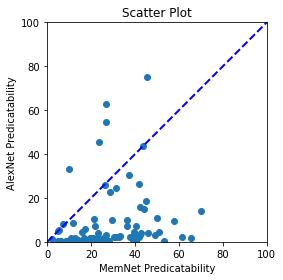

In [ ]:
#fig_size = 6  # 6 inches by 6 inches square figure

# Create the figure with the desired size
#plt.figure(figsize=(fig_size, fig_size))

# Create scatter plot with error bars
plt.scatter(ev_memnet, ev_alexnet)

# Title and labels
plt.title('Scatter Plot')
plt.xlabel('MemNet Predicatability')
plt.ylabel('AlexNet Predicatability')

# Remove right and top spines
# plt.gca().spines['right'].set_visible(False)
# plt.gca().spines['top'].set_visible(False)

plt.gca().set_aspect('equal', 'box')

plt.plot([0, 100], [0, 100], color='blue', linestyle='--', linewidth=2, label='x=y Line')

plt.xlim(0, 100)
plt.ylim(0, 100)

# Show the plot with a tight layout to ensure all data is visible
plt.tight_layout()
plt.show()

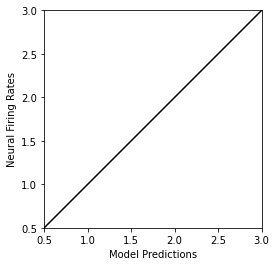

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.scatter(p,np.mean(rates,axis=1))
plt.ylabel('Neural Firing Rates')
plt.xlabel('Model Predictions')
plt.plot([0,3],[0,3],'k')
plt.xlim(0.5,3)
plt.ylim(0.5,3)
ax.set_aspect(aspect=1)
plt.show()